Current Charger Infrastructure by County

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

2022-11-15 18:26:20.523677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_chargers = pd.read_csv('Resources/Electric_Vehicle_Charging_Stations_in_New_York.csv') 
df_chargers.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types
0,ELEC,Town of Penfield - Library,1985 Baird Rd,NaN,Penfield,NY,14526,NaN,585-340-8720,E,...,43.137476,-77.465214,06/07/2021,49941,2022-02-10 19:42:29,LG,NaN,NaN,04/01/2012,J1772
1,ELEC,Village of Webster,28 West Main Street,NaN,Webster,NY,14580,NaN,866-816-7584,E,...,43.211386,-77.431663,11/10/2022,116756,2022-11-10 02:00:34,NaN,NaN,NaN,08/31/2018,J1772
2,ELEC,HOTSARA CHARGER STATION 1,100 Main St,NaN,Saranac Lake,NY,12983,NaN,888-758-4389,E,...,44.326862,-74.130150,11/10/2022,149787,2022-11-10 00:57:46,NaN,NaN,NaN,12/07/2019,J1772
3,ELEC,Houghton College,9736 Rt 19,NaN,Houghton,NY,14744,NaN,866-816-7584,E,...,42.423869,-78.154428,11/10/2022,157942,2022-11-10 02:00:45,NaN,NaN,NaN,05/15/2020,J1772
4,ELEC,NYC FLEET DPRMBLOT8_1_L3,920 Father Capodanno Blvd,NaN,Midland Beach,NY,10305,NaN,888-758-4389,E,...,40.572636,-74.086140,11/10/2022,182295,2022-11-10 01:05:12,NaN,NaN,NaN,01/27/2021,CHADEMO J1772COMBO


In [3]:
df_chargers["ZIP"].dropna()


0       14526
1       14580
2       12983
3       14744
4       10305
        ...  
3079    14222
3080    10314
3081    12834
3082    13440
3083    14454
Name: ZIP, Length: 3084, dtype: int64

In [38]:
len(df_chargers)

3084

In [5]:
#getting planned charger count
df_chargers['Status Code'].value_counts()

E    3084
Name: Status Code, dtype: int64

Creating Zipcode Map to Find Cities

In [6]:
from uszipcode import SearchEngine

/Users/hosseindabiri/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [40]:
#Creating a dictionary that shows which county each zipcode is in
zipcodes_to_search = list(df_chargers['ZIP'].unique())
search = SearchEngine()
zip_map = {}


for zipcode in zipcodes_to_search:
    if zipcode == 12081:
        zip_info= 'WARREN'
    elif zipcode == 12217:
        zip_info= 'Albany'
    else:
        zip_info = search.by_zipcode(zipcode).county
        zip_map[zipcode] = zip_info

zip_map

{14526: 'Monroe County',
 14580: 'Monroe County',
 12983: 'Franklin County',
 14744: 'Allegany County',
 10305: 'Richmond County',
 14227: 'Erie County',
 11220: 'Kings County',
 13090: 'Onondaga County',
 10954: 'Rockland County',
 14853: 'Tompkins County',
 11040: 'Nassau County',
 12205: 'Albany County',
 11976: 'Suffolk County',
 12590: 'Dutchess County',
 11212: 'Kings County',
 12534: 'Columbia County',
 14204: 'Erie County',
 10901: 'Rockland County',
 12180: 'Rensselaer County',
 10065: 'New York County',
 13027: 'Onondaga County',
 14621: 'Monroe County',
 11954: 'Suffolk County',
 11710: 'Nassau County',
 12110: 'Albany County',
 11901: 'Suffolk County',
 12020: 'Saratoga County',
 12477: 'Ulster County',
 13441: 'Oneida County',
 12144: 'Rensselaer County',
 14223: 'Erie County',
 14850: 'Tompkins County',
 14616: 'Monroe County',
 12054: 'Albany County',
 12866: 'Saratoga County',
 14731: 'Cattaraugus County',
 10022: 'New York County',
 14072: 'Erie County',
 12065: 'Sarat

# Feature Engineering 'city' Column for df_chargers

In [41]:
#mapping county information for each charger based on zipcode
df_chargers['County'] = df_chargers['ZIP'].map(zip_map) 
df_chargers['County'].head()

0      Monroe County
1      Monroe County
2    Franklin County
3    Allegany County
4    Richmond County
Name: County, dtype: object

# Saving Total Electrical Charger Count in Each County

In [9]:
df_charger_counts = pd.DataFrame(df_chargers['County'].value_counts()) 
df_charger_counts.reset_index(inplace=True) 
df_charger_counts.columns=['County', 'Charger Count'] 
df_charger_counts.head(10)

,County,Charger Count
0,New York County,357
1,Albany County,331
2,Erie County,212
3,Monroe County,179
4,Suffolk County,178
5,Saratoga County,146
6,Westchester County,122
7,Kings County,108
8,Onondaga County,100
9,Queens County,98


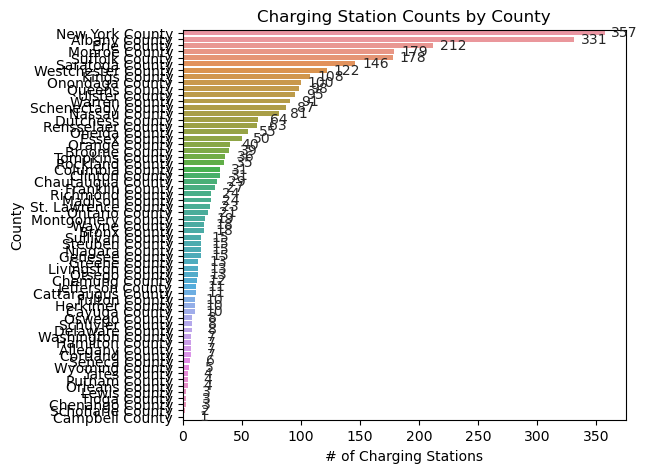

In [11]:
fig, ax = plt.subplots()
with plt.style.context('seaborn-whitegrid'):
    sns.barplot(x='Charger Count', y='County', data=df_charger_counts, orient='h', ax=ax)
    ax.set_title('Charging Station Counts by County')
    ax.set_xlabel('# of Charging Stations')
    x_labels = list(df_charger_counts['Charger Count'])
    rects = ax.patches

    for rect, label in zip(rects, x_labels):
        width = rect.get_width()
        ax.text(rect.get_width()+17, rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width),
                 ha='center', va='center')
    plt.tight_layout();
plt.savefig('images/charger_counts.png', facecolor='white')

In [12]:
#saving the df for dashboarding
path = 'Resources'
output_file = os.path.join(path,f'df_charger_counts.csv') 
df_charger_counts.to_csv(output_file, index=False)

In [ ]:
comparison_df=pd.DataFrame()
i=0
for county in top_ten_counties:
    comparison_df.loc[i, 'County']=county
    
    comparison_df.loc[i, 'EV Count for 2021-05-31']= \
    county_information[county]['df']["EV's on the Road"][-1]
    
    comparison_df.loc[i, 'EV Prediction for 2023-08-31'] = \
    round(county_information[county]['Predictions']['Predictions'][26],0)
    
    comparison_df.loc[i, 'Existing Charger Count'] = \
    int(df_charger_counts[df_charger_counts['County']==county]['Charger Count'])
    i+=1

comparison_df['Chargers per EV'] = \
round(comparison_df['Existing Charger Count']/\
      comparison_df['EV Prediction for 2023-08-31'],3)

comparison_df['EVs per Charger'] = \
round(comparison_df['EV Prediction for 2023-08-31']/\
      comparison_df['Existing Charger Count'],0)

comparison_df['EVs Added (Today-2023)'] = \
comparison_df['EV Prediction for 2023-08-31'] - comparison_df['EV Count for 2021-05-31']

comparison_df.sort_values('EV Prediction for 2023-08-31', ascending=False, 
                          inplace=True)
comparison_df.set_index('County', inplace=True)
comparison_df